In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
%matplotlib inline

Optimized a step
Optimized a step
Optimized a step


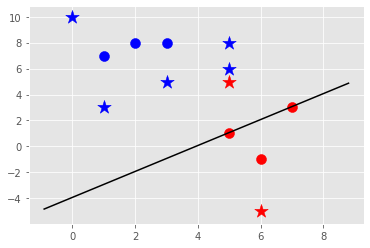

In [4]:
class support_vector_machine:
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'} 
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, data):
        self.data = data
        opt_dict = {}
        
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value *0.1,
                      self.max_feature_value *0.01,
                      self.max_feature_value *0.001,]
        
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
                
        
        

   
    def predict(self, features):
        self.features = features
        classification = np.sign(np.dot(np.array(features),self.w)+ self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return classification
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        datarange=(self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        plt.show()

        nsv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'y--')
        plt.show()
          
            
        db1 = hyperplane(hyp_x_min,self.w,self.b,1)
        db2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'k')
        
        
        plt.show()
      
    
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}


svm = support_vector_machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
              [1,3],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8],]
for p in predict_us:
    svm.predict(p)
svm.visualize()